In [55]:
# This file is created to run kmeans using the HOMA2 three cohort of the DE project (DDP,DPPOS, and JHS)

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np

In [3]:
# read the data

path = '/Users/zhongyuli/Desktop/python/cluster analysis/dataset/data_array_homa2.csv'

data_6c = pd.read_csv(path) 
data_6c[:10]




,study_id,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,glucosef2,insulinf2,study,homa2b,homa2ir
0,3278,33.87268,6.4,48.0,31.0,768,124.00000,78.00000,24.774193,56.01644,8.6025,1850.4,dppos,485.1,27.027027
1,8663,30.12909,9.6,97.0,36.0,197,121.66667,81.66667,5.472222,58.00000,9.5460,1806.0,mesa,427.8,27.027027
2,8543,22.68000,6.0,64.0,80.0,103,98.33333,46.33333,1.287500,77.00000,7.6590,1554.0,mesa,489.7,23.255814
3,8613,29.81743,7.7,NaN,34.0,417,73.33333,37.33333,12.264706,79.00000,9.9345,1464.0,mesa,348.6,23.255814
4,2932,39.92760,6.1,100.0,45.0,252,113.00000,70.00000,5.600000,40.03288,10.1565,1238.4,dppos,297.6,20.833333
5,8535,39.66473,5.7,160.0,63.0,66,169.00000,81.00000,1.047619,88.00000,9.8235,1278.0,mesa,316.2,20.833333
6,8577,34.68809,5.6,114.0,35.0,112,154.00000,92.00000,3.200000,70.00000,4.9395,1518.0,mesa,911.0,20.408163
7,8588,28.96452,6.8,111.0,37.0,139,170.66667,81.33333,3.756757,79.00000,9.1575,1182.0,mesa,321.2,19.607843
8,8491,30.56805,7.0,56.0,46.0,171,120.33333,66.33333,3.717391,70.00000,7.4925,1176.0,mesa,412.2,18.518519
9,8622,29.87548,7.1,91.0,38.0,284,136.33333,75.00000,7.473684,73.00000,6.1050,1116.0,mesa,534.8,17.241379


In [14]:
# preprocessing - standardize the data
study_id = data_6c['study_id']
data_to_scale = data_6c.drop('study_id', axis=1)
data_to_scale = data_6c.drop('study', axis=1)

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data_to_scale)

# Convert scaled data back to a DataFrame and add study_id and study back

scaled_data_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)
scaled_data_df['study_id'] = study_id
scaled_data_df['study'] = data_6c['study']
scaled_data_df[:5]


,study_id,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,glucosef2,insulinf2,homa2b,homa2ir,study
0,3278,0.115472,0.083610,-1.724126,-1.242539,6.772583,-0.030108,0.230617,6.513853,-0.542181,0.992807,10.720668,4.497958,8.850779,dppos
1,8663,-0.411339,3.405091,-0.303114,-0.864157,0.515186,-0.154445,0.464804,0.569752,-0.389744,1.564560,10.436166,3.794652,8.850779,mesa
2,8543,-1.459601,-0.331575,-1.260122,2.465599,-0.514928,-1.397818,-1.791911,-0.718946,1.070411,0.421055,8.821425,4.554418,7.439654,mesa
3,8613,-0.455197,1.432962,NaN,-1.015510,2.926092,-2.730002,-2.366734,2.661518,1.224111,1.799988,8.244732,2.822545,7.439654,mesa
4,2932,0.967542,-0.227778,-0.216114,-0.183071,1.117913,-0.616269,-0.280338,0.609102,-1.770521,1.934518,6.799154,2.196566,6.533202,dppos


In [15]:
kmeans = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57
)

# "init" controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". 
# Setting this to "k-means++" employs an advanced trick to speed up convergence

#"n_clusters" sets k for the clustering step. This is the most important parameter for k-means.

# "n_init" sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. 
#The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [16]:
# select five variables to cluster
selected_variables = ['bmi', 'hba1c', 'dmagediag','homa2b','homa2ir']
data_to_cluster = scaled_data_df[selected_variables]

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57)
kmeans.fit(data_to_cluster)


# Add the labels to the scaled dataset
scaled_data_df['cluster'] = kmeans.labels_




In [17]:
# The lowest SSE value
kmeans.inertia_

8811.77083557657

In [18]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.27771766,  3.30959856, -0.40636723, -0.80931684,  0.1138755 ],
       [ 0.13495444,  0.0323477 ,  0.12525475,  2.41091682,  2.37758198],
       [ 0.66459635, -0.05810555, -0.86838231,  0.19111642,  0.22548702],
       [-0.55724755, -0.24540651,  0.68933419, -0.4180412 , -0.51965657]])

In [9]:
# The number of iterations required to converge
kmeans.n_iter_

18

In [10]:
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

In [19]:
# HOW to choose the number of clusters
# 1) The elbow method: 

kmeans_kwargs = { # set the parameters for the kmeans algorithm
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 57,
}

# A list holds the SSE values for each k
sse = [] #initiate an empty list to store the sum of squared errors 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_to_cluster)
    sse.append(kmeans.inertia_)

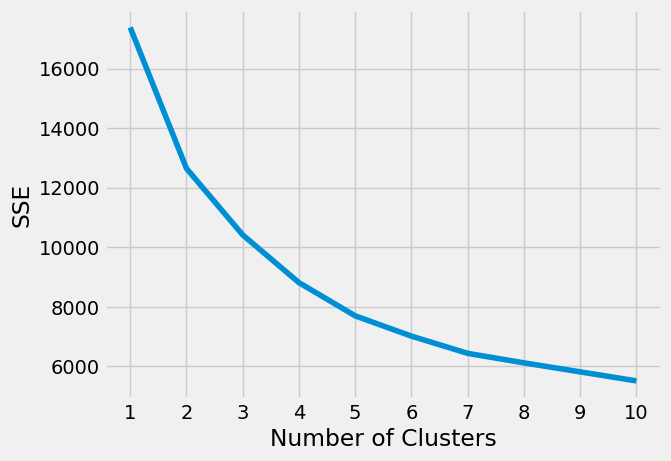

In [20]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [21]:
# Determining the elbow point in the SSE curve isn’t always straightforward. 
# If you’re having trouble choosing the elbow point of the curve, then you could use a Python package:
# kneed, to identify the elbow point programmatically:

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow # returns the elbow point

4

In [22]:
cluster_summary = scaled_data_df.groupby('cluster').describe()
print(cluster_summary)
data_to_plot = scaled_data_df[selected_variables + ['cluster']]

        study_id                                                            \
           count         mean          std   min      25%     50%      75%   
cluster                                                                      
0          150.0  5830.940000  2685.897563  20.0  5575.75  6712.0  7795.25   
1          245.0  6524.812245  2557.498460  61.0  3590.00  8472.0  8575.00   
2         1343.0  3864.736411  2107.213496  23.0  2541.00  3096.0  3670.50   
3         1738.0  5465.186997  1772.793163   4.0  3665.25  6010.5  6620.50   

                    bmi            ...    homa2b            homa2ir            \
            max   count      mean  ...       75%        max   count      mean   
cluster                            ...                                          
0        8681.0   150.0  0.277718  ... -0.566945   2.145015   150.0  0.113875   
1        8682.0   245.0  0.134954  ...  2.839728  16.896013   245.0  2.377582   
2        8680.0  1343.0  0.665518  ...  0.565340

In [40]:
# add cluster labels to the original dataset
data_6c['cluster'] = scaled_data_df['cluster']
# summarize the data by cluster, show the mean of each variable

cluster_summary_or_homa2 = data_6c[selected_variables + ['cluster']].groupby('cluster').mean()
print(cluster_summary_or_homa2)

# save the summary data
cluster_summary_or_homa2.to_csv('/Users/zhongyuli/Desktop/python/cluster analysis/dataset/cluster_summary_or_homa2.csv') 





               bmi     hba1c  dmagediag      homa2b   homa2ir
cluster                                                      
0        35.025618  9.508000  57.783689   52.703333  3.677764
1        34.011123  6.350612  64.701325  315.063673  9.727491
2        37.781378  6.263961  51.763441  134.163217  3.975876
3        29.092179  6.082739  72.036105   84.647066  1.985933


In [94]:
# report the sample size by study
sample_size_by_study = data_6c.groupby(['study']).size()
print(sample_size_by_study)


study
aric      1245
cardia     357
dpp        685
dppos      860
jhs         90
mesa       209
dtype: int64


In [42]:
# sample size in each cluster
cluster_size = data_6c.groupby('cluster').size()
print(cluster_size)

cluster
0     150
1     245
2    1343
3    1738
dtype: int64


In [43]:
# rename the cluster labels
data_to_plot['cluster'] = data_6c['cluster'].replace({0:'SIDD', 1:'SIRD', 2:'MOD', 3:'MARD'})

/var/folders/mw/svm2x9qn5fx658rhfzs94mxh0000gn/T/ipykernel_68209/766508848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['cluster'] = data_6c['cluster'].replace({0:'SIDD', 1:'SIRD', 2:'MOD', 3:'MARD'})


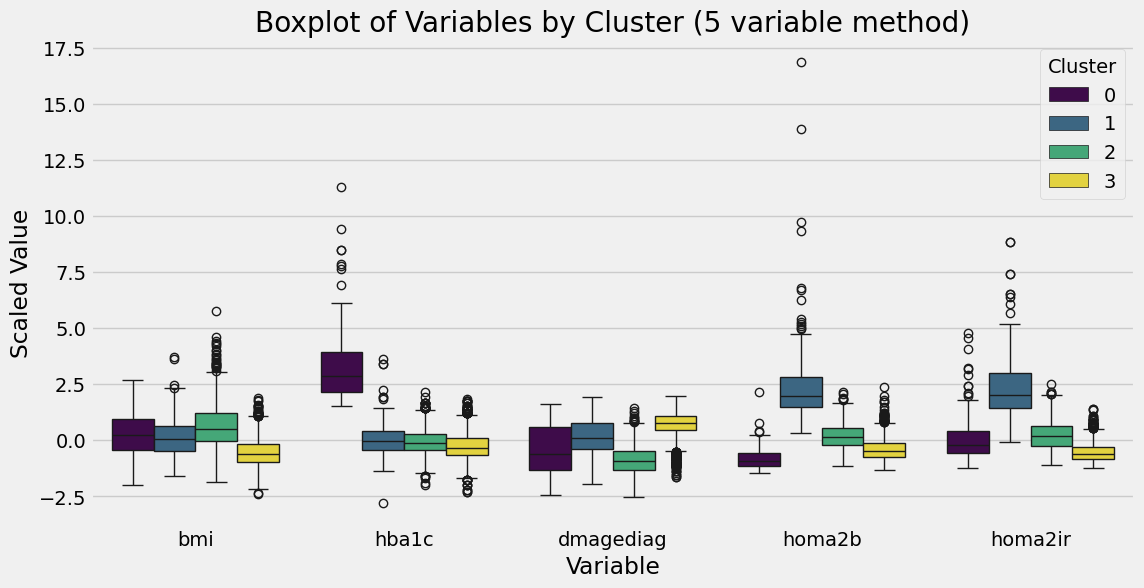

In [23]:
melted_data = pd.melt(data_to_plot, id_vars=['cluster'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='cluster', palette='viridis')
plt.title('Boxplot of Variables by Cluster (5 variable method)')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='Cluster', loc='upper right')
plt.show()

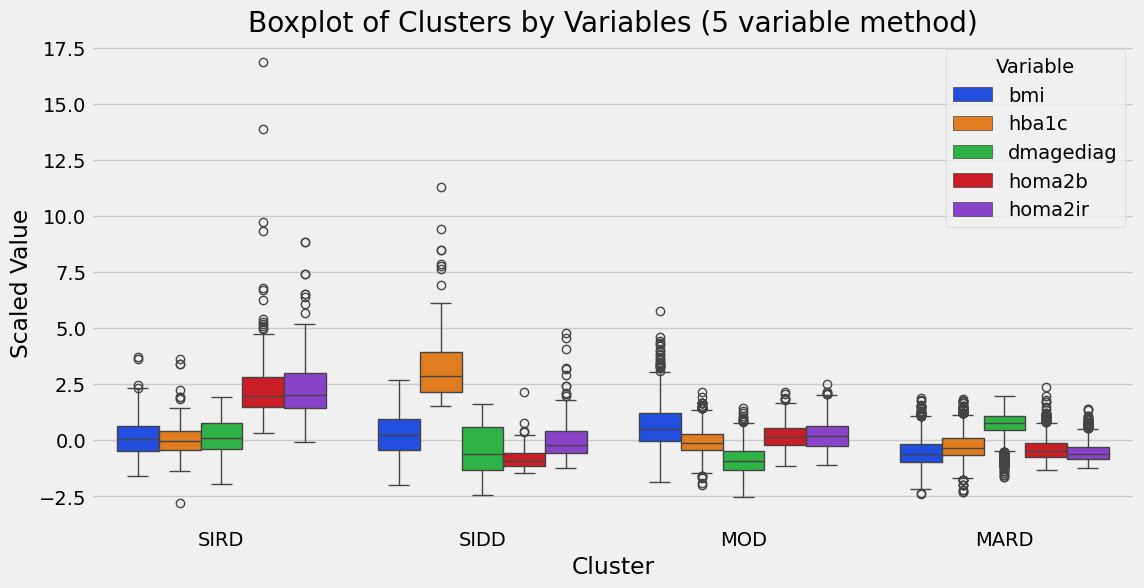

In [45]:
melted_data2 = pd.melt(data_to_plot, id_vars=['cluster'], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data2, x='cluster', y='Value', hue='Variable', palette='bright')
plt.title('Boxplot of Clusters by Variables (5 variable method)')
plt.xlabel('Cluster')
plt.ylabel('Scaled Value')
plt.legend(title='Variable', loc='upper right')
plt.show()

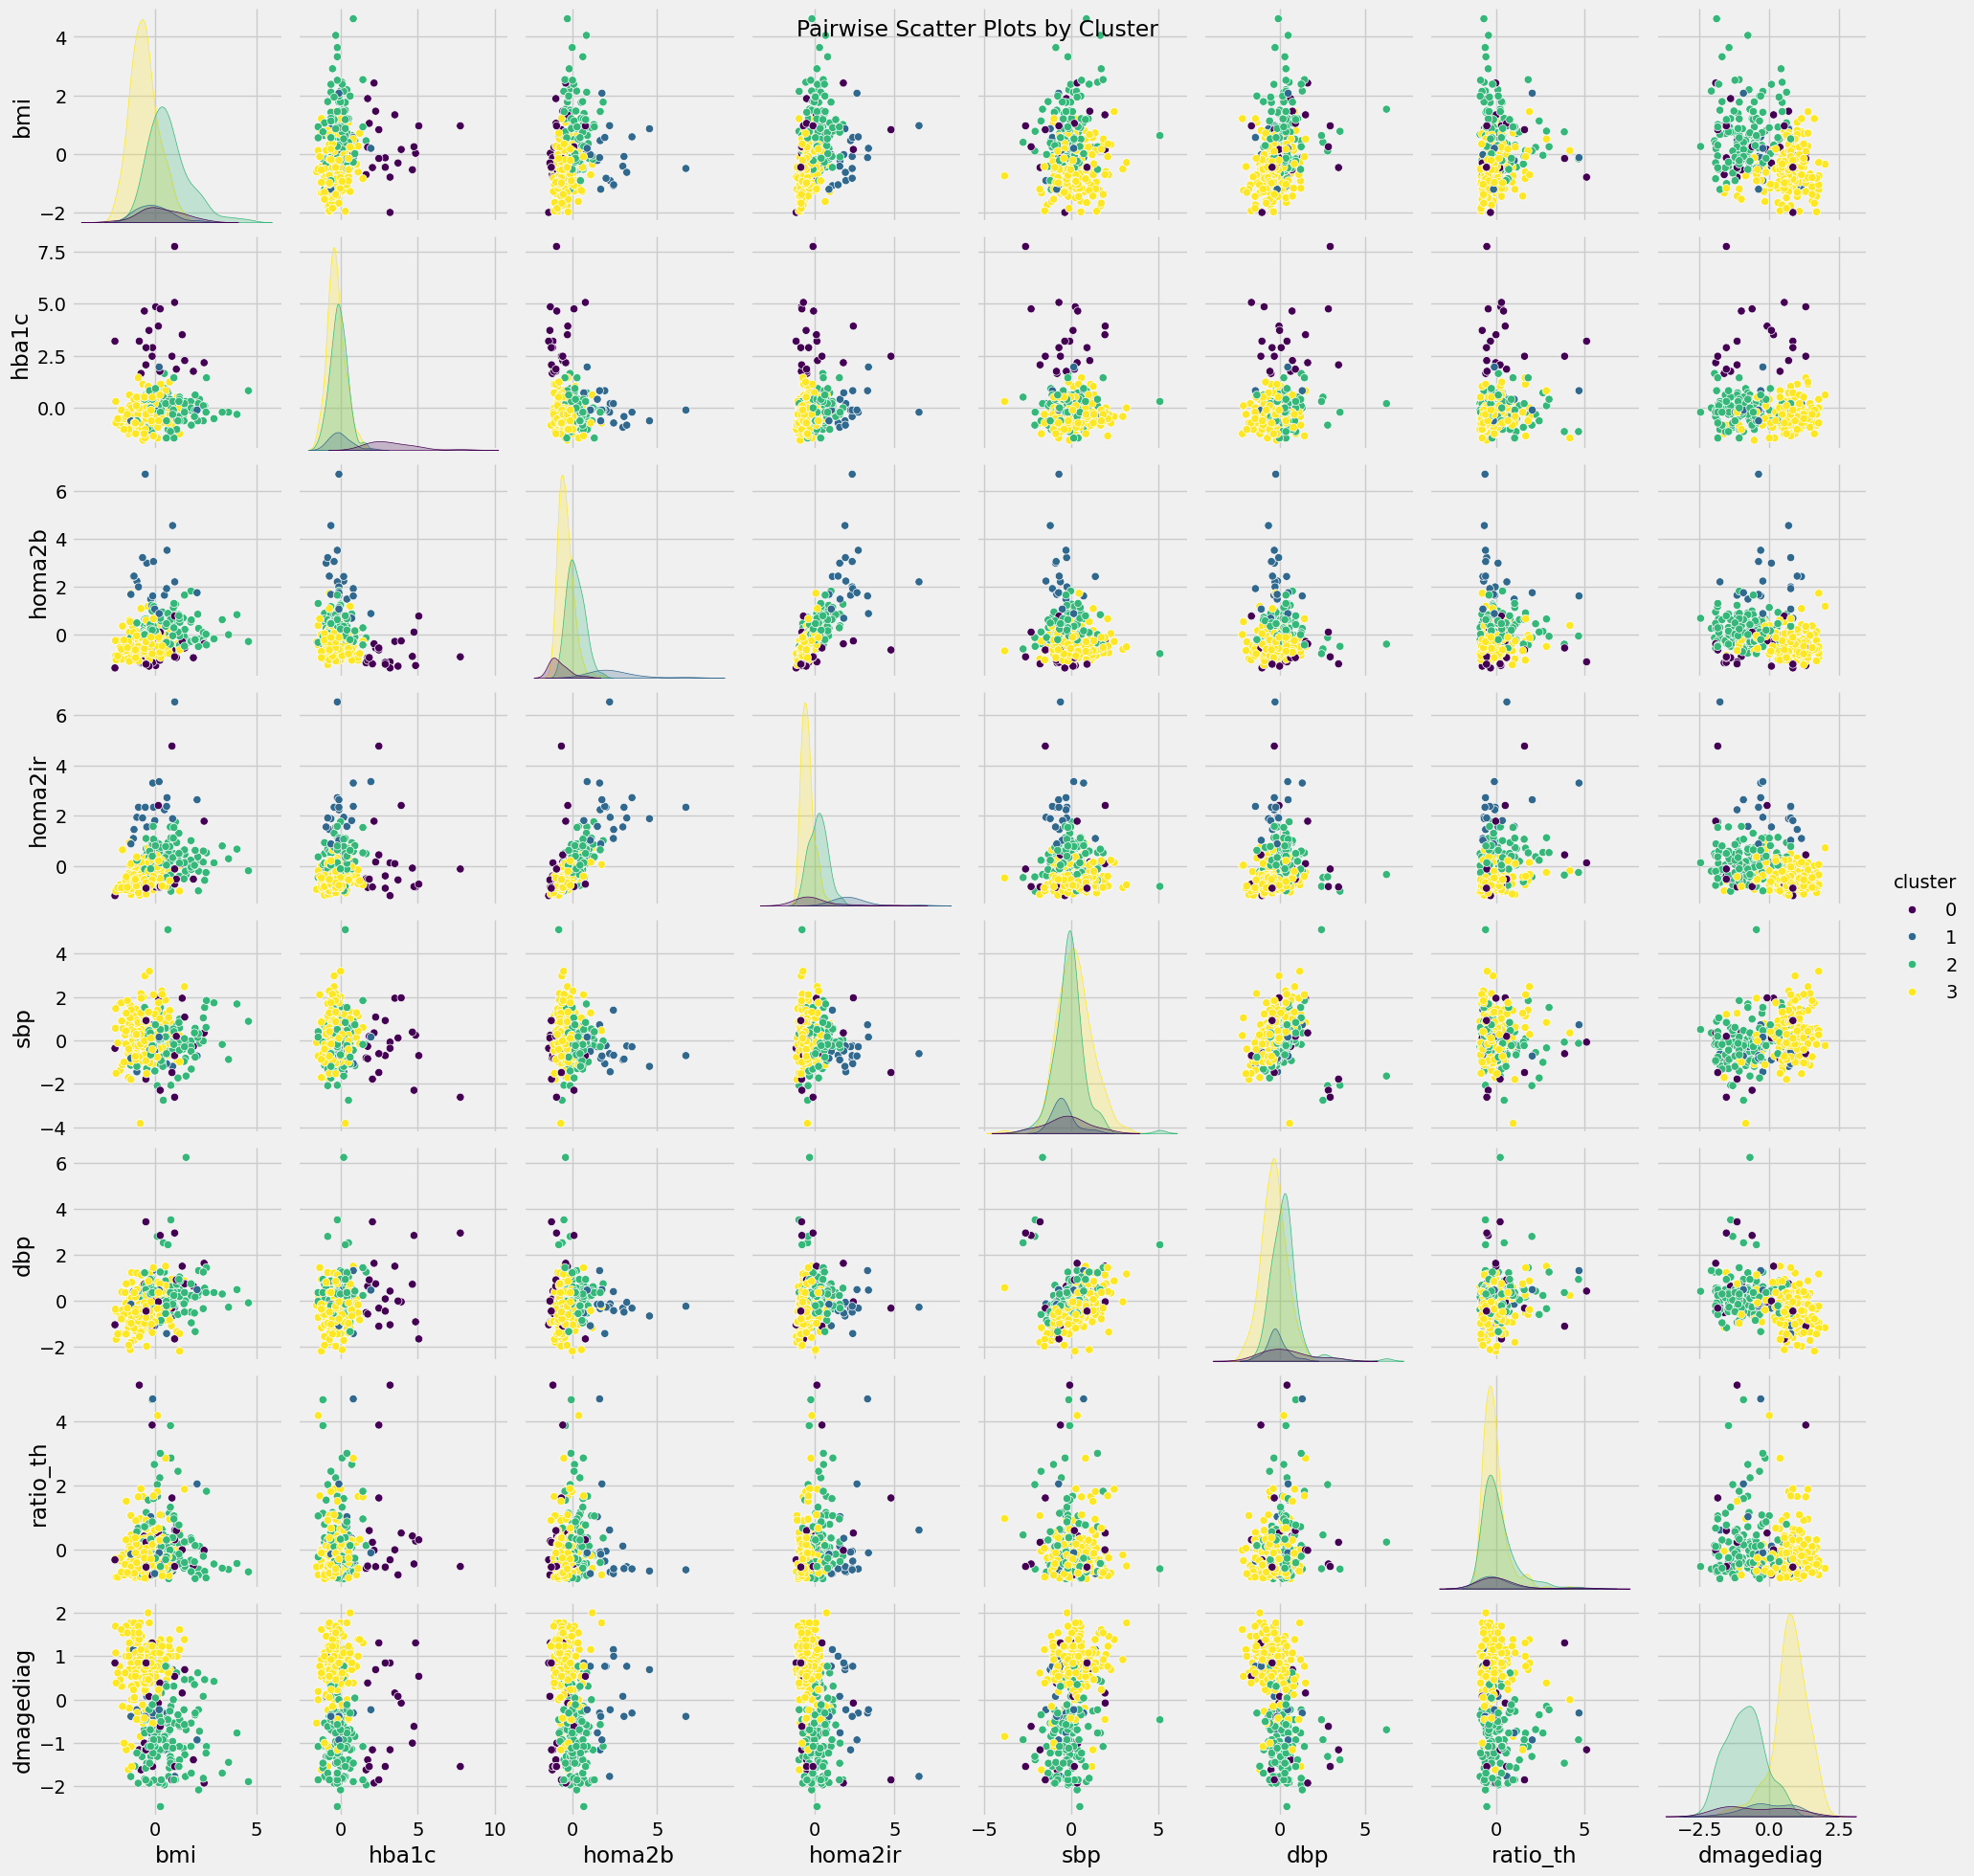

In [26]:
# Sampled to reduce overplotting and improve performance
sampled_df = scaled_data_df.sample(frac=0.1)  # Adjust frac as needed

sns.pairplot(sampled_df, vars=['bmi', 'hba1c', 'homa2b','homa2ir','sbp', 'dbp', 'ratio_th', 'dmagediag'], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Scatter Plots by Cluster')
plt.show()


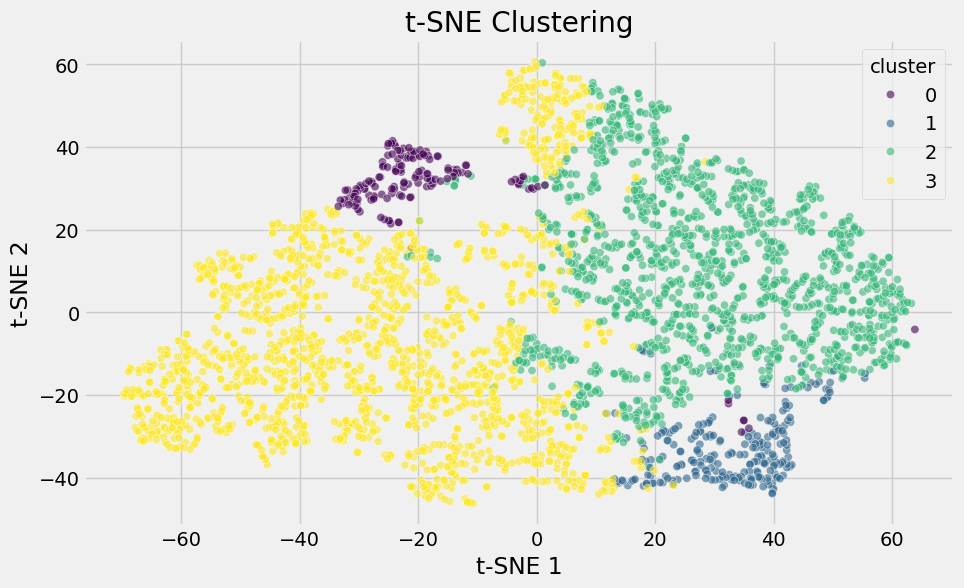

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
var_drop=['cluster', 'study_id']
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_to_plot.drop('cluster', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=scaled_data_df['cluster'], palette='viridis', alpha=0.6)
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


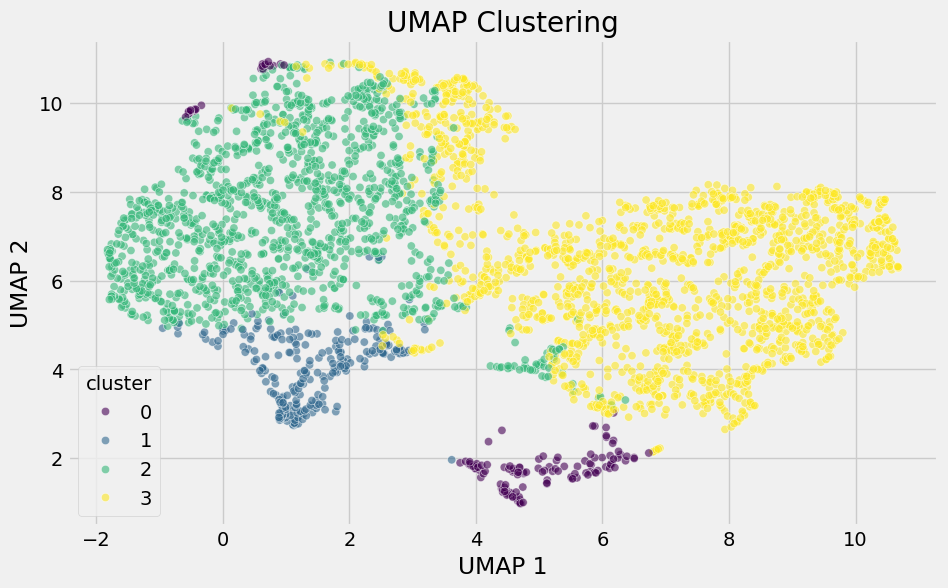

In [32]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(data_to_plot.drop('cluster', axis=1))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=scaled_data_df['cluster'], palette='viridis', alpha=0.6)
plt.title('UMAP Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [46]:
scaled_data_df.columns


Index(['study_id', 'bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp',
       'ratio_th', 'dmagediag', 'glucosef2', 'insulinf2', 'homa2b', 'homa2ir',
       'study', 'cluster'],
      dtype='object')

In [52]:
# find missing values in the selected variables
missing_values = scaled_data_df[selected_variables2].isnull().sum()
print(missing_values)
# drop missing values
scaled_data_df = scaled_data_df.dropna(subset=selected_variables2)
# check the missing values again
missing_values = scaled_data_df[selected_variables2].isnull().sum()
print(missing_values)

bmi          0
hba1c        0
ldlc         0
hdlc         0
tgl          0
sbp          0
dbp          0
ratio_th     0
dmagediag    0
dtype: int64
bmi          0
hba1c        0
ldlc         0
hdlc         0
tgl          0
sbp          0
dbp          0
ratio_th     0
dmagediag    0
dtype: int64


In [53]:
# now let's try our new kmeans model with six cohorts
selected_variables2 = ['bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'ratio_th','dmagediag']


data_to_cluster2 = scaled_data_df[selected_variables2]

kmeans = KMeans(init="random", n_clusters=4, n_init=10, max_iter=300, random_state=57)
kmeans.fit(data_to_cluster2)

# Add the labels to the scaled dataset
scaled_data_df['cluster2'] = kmeans.labels_



In [54]:
kmeans.inertia_


20013.89001497408

In [62]:
cluster_summary2 = scaled_data_df.groupby('cluster2').describe()

# add cluster labels to the original dataset
data_6c['cluster2'] = scaled_data_df['cluster2']
# summarize the data by cluster, show the mean of each variable
cluster_summary_or_homa2_2 = data_6c[selected_variables2 + ['cluster2']+['homa2b']+['homa2ir']].groupby('cluster2').mean()
print(cluster_summary_or_homa2_2)
# save the summary data
cluster_summary_or_homa2_2.to_csv('/Users/zhongyuli/Desktop/python/cluster analysis/dataset/cluster_summary_or_homa2_2.csv')

                bmi     hba1c        ldlc       hdlc         tgl         sbp  \
cluster2                                                                       
0.0       33.826532  6.379298   97.648070  34.534737  339.821053  126.533890   
1.0       38.101405  6.559725  122.517728  44.041997  142.033563  120.031874   
2.0       29.158949  5.987400  119.583734  62.339061  106.884307  128.058498   
3.0       30.675056  6.273446   85.032327  42.891208  134.730018  126.077627   

                dbp   ratio_th  dmagediag      homa2b   homa2ir  
cluster2                                                         
0.0       76.938997  10.255267  58.329824  138.660351  4.500940  
1.0       84.228207   3.404286  50.704003  132.030379  4.128153  
2.0       70.643686   1.807811  67.890781  104.411226  2.392484  
3.0       66.281102   3.256147  73.203574  111.495737  3.032223  


/var/folders/mw/svm2x9qn5fx658rhfzs94mxh0000gn/T/ipykernel_68209/3565723212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot2['cluster2'] = data_6c['cluster2'].replace({0:'SIRD', 1:'MOD', 2:'SIDD', 3:'MARD'})


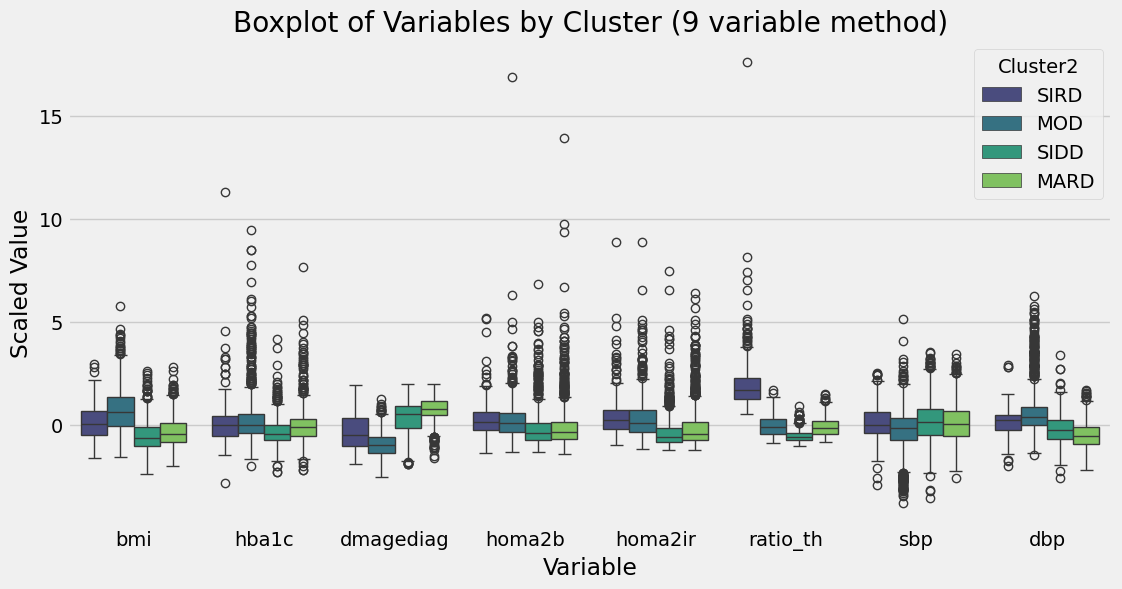

In [66]:
data_to_plot2 = scaled_data_df[selected_variables + ['cluster2']+['ratio_th']+['sbp']+['dbp']]
# rename the cluster labels
data_to_plot2['cluster2'] = data_6c['cluster2'].replace({0:'SIRD', 1:'MOD', 2:'SIDD', 3:'MARD'})

melted_data3 = pd.melt(data_to_plot2, id_vars=['cluster2'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data3, x='Variable', y='Value', hue='cluster2', palette='viridis')
plt.title('Boxplot of Variables by Cluster (9 variable method)')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='Cluster2', loc='upper right')
plt.show()

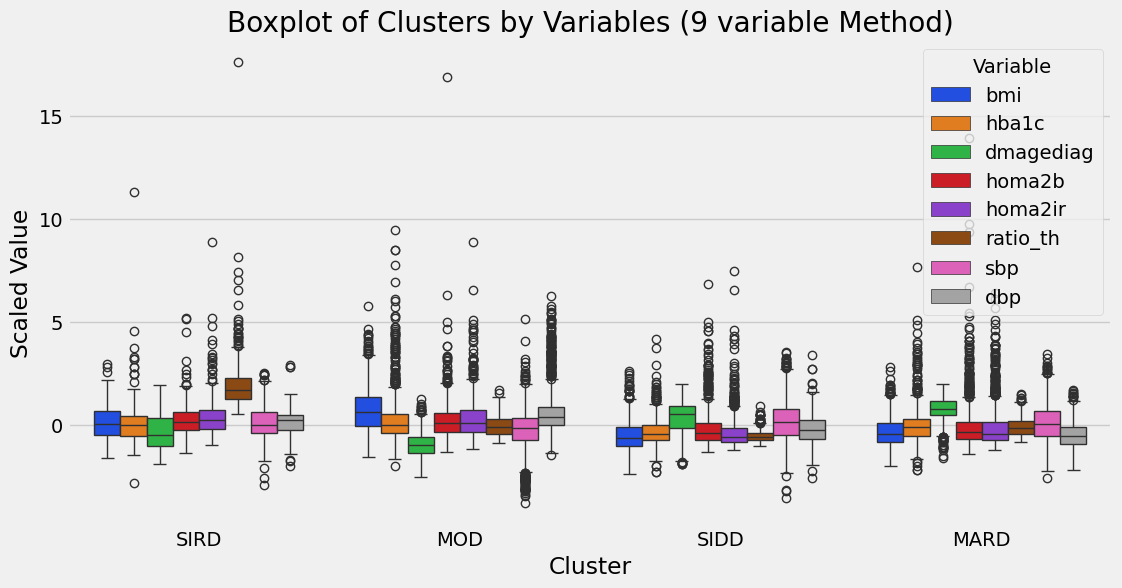

In [68]:
melted_data4 = pd.melt(data_to_plot2, id_vars=['cluster2'], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data4, x='cluster2', y='Value', hue='Variable', palette='bright')
plt.title('Boxplot of Clusters by Variables (9 variable Method)')
plt.xlabel('Cluster')
plt.ylabel('Scaled Value')
plt.legend(title='Variable', loc='upper right')
plt.show()

In [73]:
# compare the two clustring methods
# first rename the cluster labels in the original dataset
data_6c['cluster'] = scaled_data_df['cluster']

data_6c['cluster2'] = scaled_data_df['cluster2']
# relabel the clusters
data_6c['cluster'] = data_6c['cluster'].replace({0:'SIDD', 1:'SIRD', 2:'MOD', 3:'MARD'})
data_6c['cluster2'] = data_6c['cluster2'].replace({0:'SIRD', 1:'MOD', 2:'SIDD', 3:'MARD'})


       study cluster cluster2
0      dppos    SIRD     SIRD
1       mesa    SIRD      MOD
2       mesa    SIRD     SIDD
3       mesa     NaN      NaN
4      dppos    SIRD      MOD
...      ...     ...      ...
3471  cardia    MARD      MOD
3472    aric    MARD     MARD
3473  cardia    MARD     SIDD
3474    aric    MARD     SIDD
3475    aric    SIDD     MARD

[3476 rows x 3 columns]


In [83]:
#compare the two clustering methods by selected variables: bmi, hba1c, dmagediag, homa2b, homa2ir
cluster_summary_or_homa2 = data_6c[selected_variables + ['cluster']].groupby('cluster').mean()
print(cluster_summary_or_homa2)
cluster_summary_or_homa2_2 = data_6c[selected_variables + ['cluster2']].groupby('cluster2').mean()
print(cluster_summary_or_homa2_2)



               bmi     hba1c  dmagediag      homa2b   homa2ir
cluster                                                      
MARD     29.078959  6.079560  72.017806   84.653735  1.982624
MOD      37.789090  6.264350  51.781614  134.280643  3.977976
SIDD     35.162380  9.481159  57.098213   52.422464  3.570777
SIRD     34.060485  6.345267  64.608332  314.954321  9.643262
                bmi     hba1c  dmagediag      homa2b   homa2ir
cluster2                                                      
MARD      30.675056  6.273446  73.203574  111.495737  3.032223
MOD       38.101405  6.559725  50.704003  132.030379  4.128153
SIDD      29.158949  5.987400  67.890781  104.411226  2.392484
SIRD      33.826532  6.379298  58.329824  138.660351  4.500940


In [84]:
#compare the two clustering methods by selected variables: bmi, hba1c, dmagediag, ratio_th, sbp, dbp 
cluster_summary_or_homa2 = data_6c[selected_variables2 + ['cluster']].groupby('cluster').mean()
print(cluster_summary_or_homa2)
cluster_summary_or_homa2_2 = data_6c[selected_variables2 + ['cluster2']].groupby('cluster2').mean()
print(cluster_summary_or_homa2_2)


               bmi     hba1c        ldlc       hdlc         tgl         sbp  \
cluster                                                                       
MARD     29.078959  6.079560  102.153851  50.019398  133.312681  127.084774   
MOD      37.789090  6.264350  115.433931  44.695964  161.289238  121.853869   
SIDD     35.162380  9.481159  108.594203  44.927536  161.094203  120.854226   
SIRD     34.060485  6.345267  100.748971  46.707819  159.016461  123.884396   

               dbp  ratio_th  dmagediag  
cluster                                  
MARD     69.002310  2.969729  72.017806  
MOD      80.953409  4.068868  51.781614  
SIDD     81.656819  4.048163  57.098213  
SIRD     71.415464  4.080897  64.608332  
                bmi     hba1c        ldlc       hdlc         tgl         sbp  \
cluster2                                                                       
MARD      30.675056  6.273446   85.032327  42.891208  134.730018  126.077627   
MOD       38.101405  6.559725  12

In [81]:
# cross tabulation of the two clustering methods
ct = pd.crosstab(data_6c['cluster'], data_6c['cluster2'])
print(ct)

cluster2  MARD  MOD  SIDD  SIRD
cluster                        
MARD       896   84   667    80
MOD         96  935   142   165
SIDD        37   81     7    13
SIRD        97   62    57    27


In [ ]:
# compare the two clustering methods by tsen
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_to_plot2.drop('cluster2', axis=1))


In [82]:
# compare the two clustering methods by rand index
from sklearn.metrics import adjusted_rand_score
#drop the missing values in the cluster labels
data_6c = data_6c.dropna(subset=['cluster', 'cluster2'])

rand_index = adjusted_rand_score(data_6c['cluster'], data_6c['cluster2'])
print(rand_index)



0.29259571284660907


In [83]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(scaled_data_df['cluster'], scaled_data_df['cluster2'])
print(ari)

0.19962389003744355


In [84]:
# The jaccard index is a measure of the similarity between two sets of data. 
# The higher the Jaccard index, the more similar the two sets of data.

from sklearn.metrics import jaccard_score
jac = jaccard_score(scaled_data_df['cluster'], scaled_data_df['cluster2'],average='micro')
print(jac)

0.09218436873747494


In [85]:
# compute the mean stats for each cluster
# add cluster label to the original data

data_3s['cluster'] = scaled_data_df['cluster']
data_3s['cluster2'] = scaled_data_df['cluster2'] 

data_3s[:5]
mean_stats = data_3s.groupby('cluster').mean()
print(mean_stats)



             study_id        bmi     hba1c        ldlc       hdlc         tgl  \
cluster                                                                         
0        9.785704e+06  37.925855  6.144898  111.664723  42.271137  190.623907   
1        9.802651e+06  33.569747  6.085405  120.926126  45.118919  165.616216   
2        9.181101e+06  30.593529  6.100973  112.805447  49.653696  144.077821   
3        8.806511e+06  45.831274  7.136323  117.748879  43.430493  147.349776   

                sbp        dbp  ratio_th  dmagediag  glucosef2   insulinf2  \
cluster                                                                      
0        124.527190  77.624409  5.085101  54.659683   6.750289  369.219242   
1        121.660338  77.190686  4.168861  49.245672   6.744000  158.552072   
2        127.340100  73.700263  3.287798  66.586611   6.670582  136.056809   
3        129.226670  80.690483  3.809108  49.635838   7.939487  232.388341   

              hom2b     homa2s   homa2ir  cl

In [86]:
mean_stats2 = data_3s.groupby('cluster2').mean()
print(mean_stats2)


              study_id        bmi     hba1c        ldlc       hdlc  \
cluster2                                                             
0         9.259925e+06  31.419158  6.060656  105.622951  54.770492   
1         9.265622e+06  40.844968  6.534292  116.703540  43.265487   
2         9.728282e+06  34.340761  6.166606  130.406534  43.176044   
3         9.810535e+06  33.812444  6.274306   93.798611  32.451389   

                 tgl         sbp        dbp   ratio_th  dmagediag  glucosef2  \
cluster2                                                                       
0         122.209016  125.756456  71.905340   2.408356  65.751314   6.630317   
1         142.789823  135.884351  85.254320   3.508436  51.921136   7.212667   
2         153.306715  115.817853  73.340369   3.746248  50.683490   6.773720   
3         385.868056  124.306658  78.518153  12.305511  54.807858   7.148708   

           insulinf2       hom2b     homa2s   homa2ir   cluster  
cluster2                        

In [87]:
#add sample size for each cluster
sample_size = data_3s.groupby('cluster2').size()
print(sample_size)

cluster2
0    488
1    452
2    551
3    144
dtype: int64


In [88]:
pd.crosstab(data_3s['cluster'], data_3s['cluster2'])

cluster2,0,1,2,3
cluster,,,,
0,64,112,122,45
1,56,131,313,55
2,360,49,71,34
3,8,160,45,10
